In [56]:
import numpy as np
import cv2
import cvutils
from skimage import io
from numpy import linalg as LA
import scipy

In [57]:
# ! pip install opencv-python
# ! pip install cvutils
# ! pip install scikit-image


In [58]:
import os
from os import listdir
from PIL import Image
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
# ! pip install opencv-python
# ! pip install cvutils
# !pip install scikit-image

In [59]:
def get_width_height_train_images():
    curr_path=os.getcwd()
    train_images_path=os.path.join(curr_path,"train_images")
#     print(train_images_path)
    for folder in os.listdir(train_images_path):
        if ".DS_" in folder:
            continue
        train_image_folder=os.path.join(train_images_path,folder)
        for file in os.listdir(train_image_folder):
            if ".DS_" in file:
                continue
            train_image=os.path.join(train_image_folder,file)
            print(train_image)            
#             im = Image.open(train_image)
            im = cv2.imread(train_image,0)
            width, height = im.shape
#             print(width,height)
            return width,height
            
            

    

In [80]:

get_width_height_train_images()

/Users/amirulislam/projects/hbku/fall_2019/app_deep_learning/Face_Detection_MDC/train_images/1/image_0042.jpg


(592, 896)

In [77]:
def resize_test_images():
   
    
    # get te width and height of training image
    dim=get_width_height_train_images()
    print("target dim ",dim)
   
    curr_path=os.getcwd()
    
    test_images_path=os.path.join(curr_path,"test_images")
    # print(train_images_path)

    folders=listdir(test_images_path)

    # add all image matrix into this list as 1D
    global_file_count=0
    for folder in folders:
        if ".DS" in folder:
            continue

        folder_location=os.path.join(test_images_path,folder)
        files=listdir(folder_location)
        for file in files:
            file_name=os.path.join(folder_location,file)
#             print(file_name)
            
            if ".DS" in file:
                continue
            im = cv2.imread(file_name,0) 
            if im.shape!=dim:
                print("Old shape is ",im.shape) 
                dim=(dim[1],dim[0])
                im = cv2.resize(im, dim,interpolation = cv2.INTER_NEAREST)
                print("New shape is ",im.shape)
                cv2.imwrite(file_name,im)
            
#             image_pil = Image.open(file_name).convert('L')
#             image_pil = image_pil.resize((int(width), int(height)), Image.NEAREST)
#             image_pil.save(file_name)
            

            global_file_count+=1
    print("number of files read = ",global_file_count)

    #     print(image.shape)
    print("Done resizing")
    
    
def resize_train_images():
    
    # get te width and height of training image
    dim=get_width_height_train_images()
    print("target dim ",dim)
   
    curr_path=os.getcwd()
    
    test_images_path=os.path.join(curr_path,"train_images")
    # print(train_images_path)

    folders=listdir(test_images_path)

    # add all image matrix into this list as 1D
    global_file_count=0
    for folder in folders:
        if ".DS" in folder:
            continue

        folder_location=os.path.join(test_images_path,folder)
        files=listdir(folder_location)
        for file in files:
            file_name=os.path.join(folder_location,file)
#             print(file_name)
            
            if ".DS" in file:
                continue
            im = cv2.imread(file_name,0) 
            if im.shape!=dim:
                print("Old shape is ",im.shape) 
                dim=(dim[1],dim[0])
                im = cv2.resize(im, dim,interpolation = cv2.INTER_NEAREST)
                print("New shape is ",im.shape)
                cv2.imwrite(file_name,im)
            
#             image_pil = Image.open(file_name).convert('L')
#             image_pil = image_pil.resize((int(width), int(height)), Image.NEAREST)
#             image_pil.save(file_name)
            

            global_file_count+=1
    print("number of files read = ",global_file_count)

    #     print(image.shape)
    print("Done resizing")
        

In [78]:
# resize_test_images()
# resize_train_images()

/Users/amirulislam/projects/hbku/fall_2019/app_deep_learning/Face_Detection_MDC/train_images/1/subject01_glasses copy.jpg
target dim  (239, 178)
Old shape is  (178, 239)
New shape is  (239, 178)
Old shape is  (239, 178)
New shape is  (178, 239)
Old shape is  (178, 239)
New shape is  (239, 178)
number of files read =  6
Done resizing


In [152]:
def read_flatten(location,count):
    '''
    read the images and return a flattened matrix 
    containing the vectors
    '''
    train_images_path=location
    # print(train_images_path)
    width,height=get_width_height_train_images()
    print(width,height)

    folders=listdir(train_images_path)
    list_of_1d_matrix=[]

    # add all image matrix into this list as 1D
    global_file_count=0
    for folder in folders:
        if ".DS" in folder:
            continue

        folder_location=os.path.join(train_images_path,folder)
        files=listdir(folder_location)
        i=0
        for file in files:
            file_name=os.path.join(folder_location,file)
            if ".DS" in file:
                continue
            print(file_name)
#             image_pil = Image.open(file_name).convert('L')
#             image = np.array(image_pil, 'uint8')
            im = cv2.imread(file_name,0)
#             print(im.shape)
            data = np.array(im)
            flattened = data.flatten()
            transposed=flattened.transpose()
            list_of_1d_matrix.append(transposed)
            
            plt.figure()
            plt.imshow(np.asarray(transposed.reshape(width,height)))

            
            i=i+1
            global_file_count+=1
            if i==count:
                break
    print("number of files read = ",global_file_count)

    #     print(image.shape)
    matrix_vectors=np.array(list_of_1d_matrix)
    return matrix_vectors
    

In [153]:
def calculate_mean_faces(image_matrix):
    '''
    calculate average vector
    subtract average from each vector
    '''
    matrix_vectors=image_matrix
    avg_vector=matrix_vectors.mean(0)
    matrix_vectors=(matrix_vectors-avg_vector)
    return matrix_vectors,avg_vector
    
    
    

In [154]:
def calculate_covariance_matrix(matrix):
    '''
    take any matrix and find its
    covariance matrix
    '''
#     return matrix.dot(matrix.transpose())
    cov_matrix=np.cov(matrix)
    cov_matrix = np.divide(cov_matrix,8.0)
    return cov_matrix

In [155]:
def get_eigen_values_sorted(matrix, percentage):
#     eigen_values, eigen_vectors = LA.eig(matrix)
    eigen_values, eigen_vectors = np.linalg.eig(matrix)
    
    
    
    idx = eigen_values.argsort()[::-1]   
    eigen_values = eigen_values[idx]
#     print("before sorting")
#     print(eigen_values)
#     print(eigen_vectors)
    
    print("Number of eigen values = ",len(idx))
    
    # to sort the eigen vectors
    list_of_eigen_vectors=[]
    for index in idx:
        list_of_eigen_vectors.append(eigen_vectors[index])
    eigen_vectors=np.array(list_of_eigen_vectors)

        

#     eigen_vectors = eigen_vectors[:,idx]
    
    ratio=percentage/100
    if eigen_vectors.shape[0]>=10:
        print("need to shorten")
        top=int(eigen_vectors.shape[0]*ratio)
        print("will take ",top)
        eigen_values=eigen_values[:top]
        eigen_vectors=eigen_vectors[:top]
    return eigen_values, eigen_vectors

    
    

In [156]:
def get_weight_vector_for_images(image_matrix,eigen_vectors):
# for each image
# we have to store a set of weights
    list_of_weights=[]
    i=0
    
    
    for mean_face in image_matrix:
    #     print(mean_face.shape)
        weights_for_this_face=[]
        print("for face ",i)
        i=i+1
        for eigen_vector in eigen_vectors:
#             print(eigen_vector.transpose(),"\n", mean_face)            
    #         print(eigen_vector.shape, mean_face.shape)
#             weight=(eigen_vector.transpose().dot(mean_face))
            weight=np.dot(eigen_vector,mean_face)
#             print("weights ",weight)
    #         print(mean_face)
            weights_for_this_face.append(weight)
        list_of_weights.append(weights_for_this_face)
    weight_vector=np.array(list_of_weights)
    return weight_vector



## Start here


## Step 1. Read image and flatten into 1d matrices

/Users/amirulislam/projects/hbku/fall_2019/app_deep_learning/Face_Detection_MDC/train_images/1/image_0042.jpg
457 397
/Users/amirulislam/projects/hbku/fall_2019/app_deep_learning/Face_Detection_MDC/train_images/1/image_0042.jpg
/Users/amirulislam/projects/hbku/fall_2019/app_deep_learning/Face_Detection_MDC/train_images/1/image_0061.jpg
/Users/amirulislam/projects/hbku/fall_2019/app_deep_learning/Face_Detection_MDC/train_images/1/image_0002.jpg
number of files read =  3
(3, 181429)


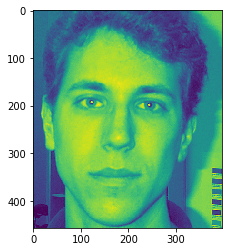

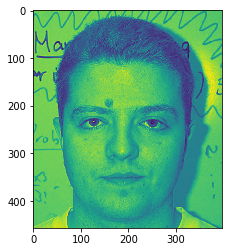

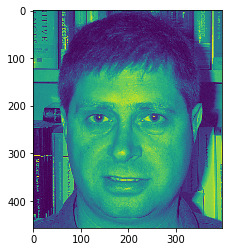

In [157]:
curr_path=os.getcwd()
train_images_path=os.path.join(curr_path,"train_images")
count_of_files=6
matrix_vectors=read_flatten(train_images_path,count_of_files)
print(matrix_vectors.shape)


In [121]:
width,height=get_width_height_train_images()
for each_vect in matrix_vectors:
    print(each_vect)

/Users/amirulislam/projects/hbku/fall_2019/app_deep_learning/Face_Detection_MDC/train_images/1/image_0042.jpg
[ 98  98  92 ... 204 193 205]
[198 198 199 ... 135 143 156]
[152 158 156 ...  57  55  94]


## Step 2. Calculate average of the matrix
## And calculate the mean faces

In [122]:
mean_face_matrix,avg_vector=calculate_mean_faces(matrix_vectors)

In [123]:
print(mean_face_matrix.shape)


(3, 181429)


In [124]:
print(mean_face_matrix.max())
print(mean_face_matrix.min())

149.33333333333331
-142.0


In [125]:
print(max(avg_vector))
print(min(avg_vector))
print(avg_vector)


228.66666666666666
13.666666666666666
[149.33333333 151.33333333 149.         ... 132.         130.33333333
 151.66666667]


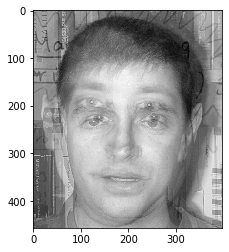

In [126]:
# plt.imshow(np.asarray(mean_face_matrix[0].reshape(width,height)))
plt.imshow(avg_vector.reshape(width,height),cmap='gray')

#### Display normalised faces

1
2
3
Showing  3  faces


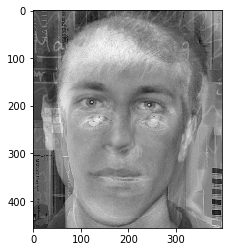

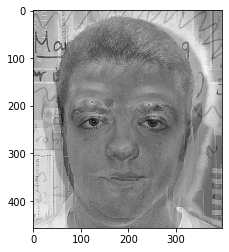

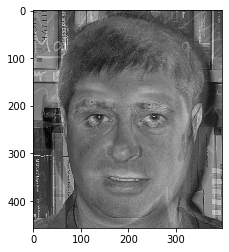

In [127]:
count=0
for mface in mean_face_matrix:
    plt.figure()
    plt.imshow(mface.reshape(width,height),cmap='gray')
    count+=1
    if count==7:
        break
    print(count)
print("Showing ",count, " faces")

## Step 3. Calculate covariance matrix

In [128]:
covar_matrix=calculate_covariance_matrix(mean_face_matrix)

In [158]:
mean_face_matrix.shape

(3, 181429)

In [129]:
print(covar_matrix.shape)

(3, 3)


In [130]:
# print("{",end="")
# for row in covar_matrix:
#     print("{",end="")
#     for elem in row:
#         print(elem, end = ',')
#     print("}",end=",")
# print("}",end=",")

## Step 5. Calculate Eigen vectors and Eigen values

### consider the matrix [3,X3]

### compute the eigenvectors of  this small co variance matrix

In [131]:

eigen_values,eigen_vectors=get_eigen_values_sorted(covar_matrix,100)

Number of eigen values =  3


In [132]:
print(eigen_values)



[352.87600067 240.06971533   0.        ]


In [133]:
print(eigen_vectors)

[[ 0.57735027 -0.66917839 -0.46783218]
 [ 0.57735027 -0.07056536  0.81344158]
 [ 0.57735027  0.73974375 -0.3456094 ]]


### Step 5. Creating eigen space
#### Creating the eigen faces

In [134]:
print(mean_face_matrix.shape,eigen_vectors.shape)

(3, 181429) (3, 3)


In [135]:
eigen_faces=np.dot(mean_face_matrix.transpose(),eigen_vectors)
eigen_faces=eigen_faces.transpose()

showing  3  eigen faces


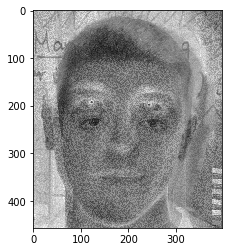

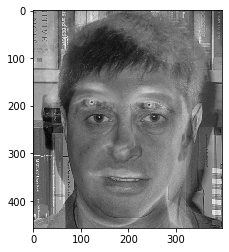

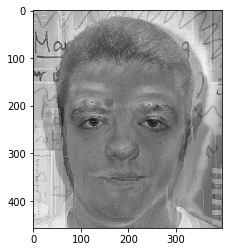

In [136]:
count=0
for eigen_face in eigen_faces:
    plt.figure()
    plt.imshow(eigen_face.reshape(width,height),cmap='gray')
    count+=1
    if count == 5:
        break
print("showing ",count," eigen faces")
#     plt.imshow(eigen_face.reshape(height,width),cmap='gray')

## Step 6. Getting the weights

In [137]:
weight_matrix=get_weight_vector_for_images(mean_face_matrix,eigen_faces)

for face  0
for face  1
for face  2


In [138]:
print(weight_matrix.shape)

(3, 3)


In [159]:
print(weight_matrix)

[[-1.84073914e-07 -3.27569015e+08 -2.37818494e+08]
 [ 1.62106080e-07 -7.58729955e+07  4.72624597e+08]
 [ 2.19678338e-08  4.03442011e+08 -2.34806104e+08]]


### Detour to check if I can get face back

Showing  3  faces


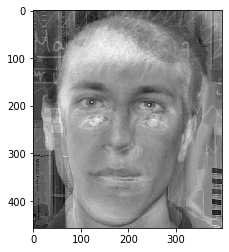

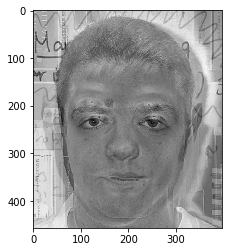

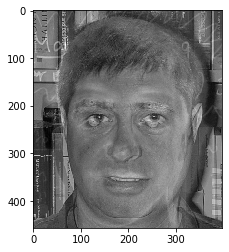

In [139]:
# Check if the weights give me back my face
# lets try for face 0

count=0
for face_weights in weight_matrix:
    image_matrix=np.zeros(width*height,)
#     print("bare ",image_matrix.shape)
#     print("skeleton is ",image_matrix.shape)
    i=0
    for eigen_vector in eigen_faces:
        re_face=(face_weights[i]*eigen_vector)
#         print("re skel is ",re_face.shape)
        image_matrix+=re_face
        i+=1
    image_matrix+=avg_vector
    plt.figure()
#     plt.imshow(image_matrix.reshape(height,width),cmap='gray')
    plt.imshow(image_matrix.reshape(width,height),cmap="gray")
    count+=1
    if count==5:
        break
print("Showing ",count," faces")


### End of Detour

### Test images

In [140]:
## Step 0. Resize test images to be same as train images

In [141]:
resize_test_images()

/Users/amirulislam/projects/hbku/fall_2019/app_deep_learning/Face_Detection_MDC/train_images/1/image_0042.jpg
target dim  (457, 397)
number of files read =  1
Done resizing


## Given test image, search for closest match

### Step 1. Read Images

/Users/amirulislam/projects/hbku/fall_2019/app_deep_learning/Face_Detection_MDC/test_images
/Users/amirulislam/projects/hbku/fall_2019/app_deep_learning/Face_Detection_MDC/train_images/1/image_0042.jpg
457 397
/Users/amirulislam/projects/hbku/fall_2019/app_deep_learning/Face_Detection_MDC/test_images/1/image_0004.jpg
number of files read =  1
(1, 181429)


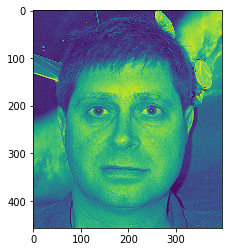

In [160]:
curr_path=os.getcwd()
test_images_path=os.path.join(curr_path,"test_images")
print(test_images_path)

test_matrix_vectors=read_flatten(test_images_path,8)




# files=listdir(test_images_path)
# # files.sort()



# list_of_1d_matrix=[]
# test_matrix_vectors=None
# # add all image matrix into this list as 1D

# for test_image in files:
# #     print(test_image)
#     file_name=os.path.join(test_images_path,test_image)    
    
# #     print(file_name)
#     if ".DS" in test_image:
#         continue
    
#     image_pil = Image.open(file_name).convert('L')
#     image = np.array(image_pil, 'uint8')
#     list_of_1d_matrix.append(image.flatten().transpose())
    
#     print(image.shape)
# test_matrix_vectors=np.array(list_of_1d_matrix)

print(test_matrix_vectors.shape)



## Step 2. Get Mean Face

In [143]:
test_mean_faces=(test_matrix_vectors-avg_vector)
    

In [144]:
print(test_mean_faces.shape)

(1, 181429)


## Step 3. Project into eigen space

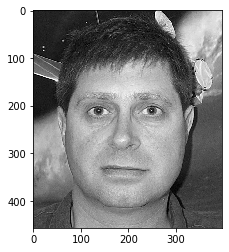

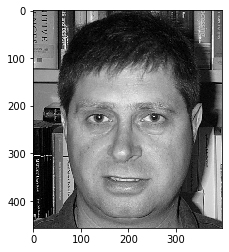

In [145]:
i=0
for test_mean_face in test_mean_faces:
    w_test=np.dot(eigen_faces,test_mean_face)
#     print(w_test)
    diff  = weight_matrix - w_test
    norms = np.linalg.norm(diff, axis=1)
#     print(norms)
#     print(min(norms))
    index = np.argmin(norms)
#     print(index)
    plt.figure()
    plt.imshow(test_matrix_vectors[i].reshape(width,height),cmap="gray")
    
    plt.figure()
    plt.imshow(matrix_vectors[index].reshape(width,height),cmap="gray")
    i+=1


    